In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['testSeries.csv']


In [73]:
df = pd.read_csv("../input/testSeries.csv")
df.head()

,Team,Opponent,Date,Matches,Result,Won,Lost,Drawn
0,Australia,England,15/03/1877,2,Drawn,1,1,0
1,Australia,England,02/01/1879,1,Won,1,0,0
2,England,Australia,06/09/1880,1,Won,1,0,0
3,Australia,England,31/12/1881,4,Won,2,0,2
4,England,Australia,28/08/1882,1,Lost,0,1,0


In [74]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(633, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
Team        633 non-null object
Opponent    633 non-null object
Date        633 non-null object
Matches     633 non-null int64
Result      633 non-null object
Won         633 non-null int64
Lost        633 non-null int64
Drawn       633 non-null int64
dtypes: int64(4), object(4)
memory usage: 39.6+ KB
None
Team        0
Opponent    0
Date        0
Matches     0
Result      0
Won         0
Lost        0
Drawn       0
dtype: int64


# Hence we observe that this data set is one of the Cleanest Data Set.
### Let's go on explorating few things:
1. The Team which has won most of the matches.
2. Teams winning in their Home ground
3. Team performing well @ Away COnditions

In [75]:
df.set_index('Team')
# Here we find the teams winning in their Home ground!
df_home_won = df.loc[df.Result == 'Won']
df_home_won.head()

,Team,Opponent,Date,Matches,Result,Won,Lost,Drawn
1,Australia,England,02/01/1879,1,Won,1,0,0
2,England,Australia,06/09/1880,1,Won,1,0,0
3,Australia,England,31/12/1881,4,Won,2,0,2
6,Australia,England,17/02/1883,1,Won,1,0,0
7,England,Australia,11/07/1884,3,Won,1,0,2


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


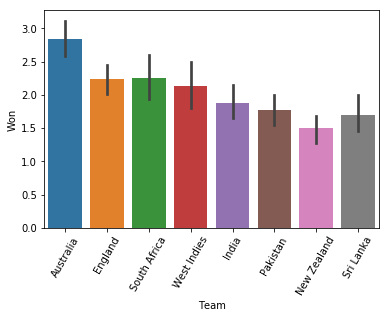

In [76]:
# Let's plot a basic Seaborn Plot!
g = sns.barplot(data = df_home_won , x = 'Team' , y='Won');
plt.xticks(rotation = 60);

## Here we get to see that Australia is the Team that has been performing very well in Home Conditions.

### Let's look at the teams who have been winning in Away Conditions!

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


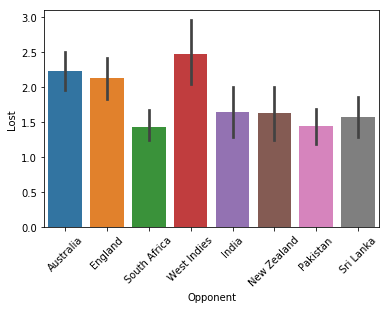

In [77]:
# Team Winning in Away Condition:
df_Away_win = df.loc[df.Result == 'Lost']
sns.barplot(data=df_Away_win , x = 'Opponent' , y ='Lost');
plt.xticks(rotation=45);

# Here we see that being Opposition West Indies have had a greater success in Away Conditions

## I have one more beautiful insight!

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


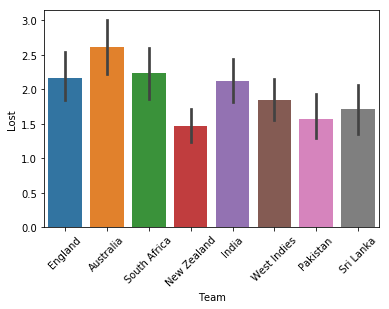

In [78]:
df_home_lost = df.loc[df.Result == 'Lost']
sns.barplot(data=df_Away_win , x = 'Team' , y ='Lost');
plt.xticks(rotation=45);
# Here we see that Australia being in Home have lost more.

# **So it is worth wondering that Australia is pretty well at home and considerably looses at Home also!**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


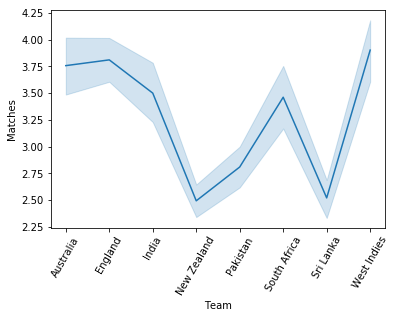

In [79]:
sns.lineplot(x="Team", y="Matches",
             data=df)
plt.xticks(rotation=60);
# We see that West indies have performed well over the course till 2019 and is the Best Team of ERA

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


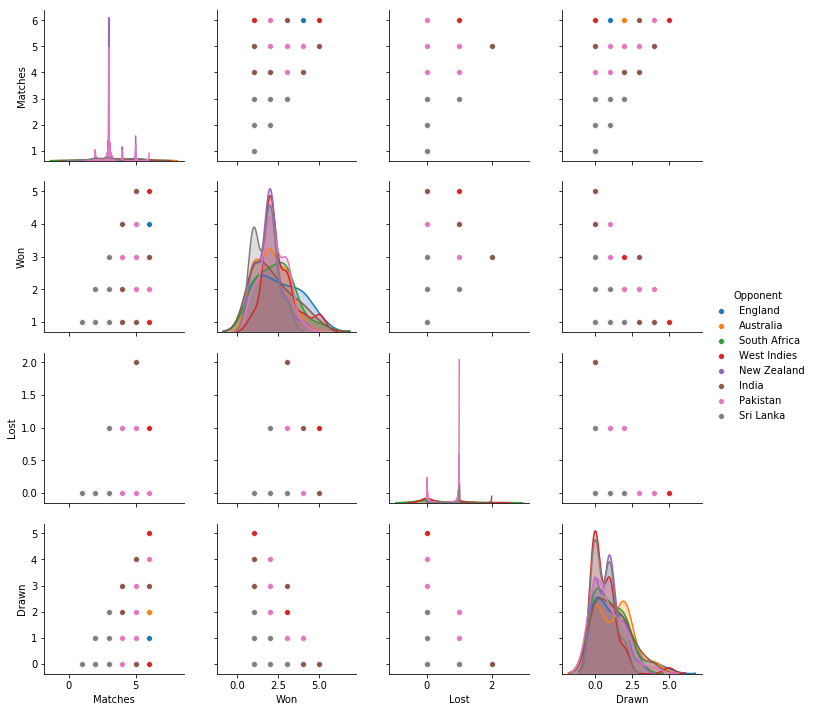

In [80]:
sns.pairplot(data = df_home_won,hue = 'Opponent')

In [81]:
df_home_won['Date'] = pd.to_datetime(df_home_won['Date'])
df_home_won['Day'] = df_home_won['Date'].dt.day
df_home_won.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Team,Opponent,Date,Matches,Result,Won,Lost,Drawn,Day
1,Australia,England,1879-02-01,1,Won,1,0,0,1
2,England,Australia,1880-06-09,1,Won,1,0,0,9
3,Australia,England,1881-12-31,4,Won,2,0,2,31
6,Australia,England,1883-02-17,1,Won,1,0,0,17
7,England,Australia,1884-11-07,3,Won,1,0,2,7


## We convert the Date attribute to date time in order to look how many matches have been played on the specific numerical date!

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


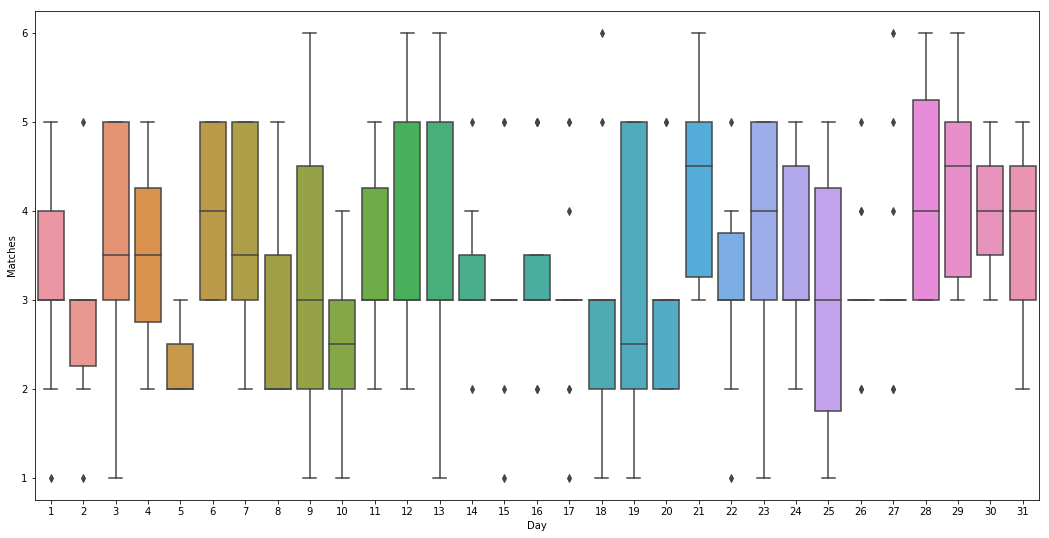

In [82]:
plt.figure(figsize=(18,9))
df_home_won['Team'] = df_home_won['Team'].astype('category')
sns.boxplot(y = 'Matches' , x = 'Day',data = df_home_won);
plt.show();

In [83]:
#We have changed it to category in order to make it unique!
df_home_won['Team'].unique()

[Australia, England, South Africa, West Indies, India, Pakistan, New Zealand, Sri Lanka]
Categories (8, object): [Australia, England, South Africa, West Indies, India, Pakistan, New Zealand, Sri Lanka]

# We'll go forward in search for the following qns!
* Every Team's Win% when played in **home** ground!
* Every Team's Win% when played in **away** ground!
* Top 2 teams performing better!


## **Win Percentage of Every Home Team! and will plot based on the number of drawn games played!**

In [84]:
## Let's find the win% for each Team!
df_home_won['Win %'] = round(100*(df_home_won['Won']/df_home_won['Matches']),2)
df_home_won.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Team,Opponent,Date,Matches,Result,Won,Lost,Drawn,Day,Win %
1,Australia,England,1879-02-01,1,Won,1,0,0,1,100.00
2,England,Australia,1880-06-09,1,Won,1,0,0,9,100.00
3,Australia,England,1881-12-31,4,Won,2,0,2,31,50.00
6,Australia,England,1883-02-17,1,Won,1,0,0,17,100.00
7,England,Australia,1884-11-07,3,Won,1,0,2,7,33.33


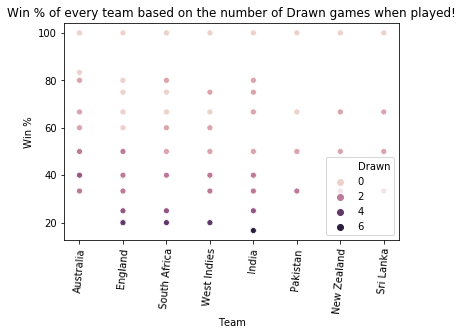

In [85]:
#Let's plot Teams by Win Percentage!
sns.scatterplot(x = 'Team' , y='Win %',data = df_home_won,hue = 'Drawn');
plt.xticks(rotation = 85);
plt.title('Win % of every team based on the number of Drawn games when played!');

## **Win % of Every Away team! and will plot this also based on the Drawn games played.**

In [86]:
df_home_lost['Win % of Opponent'] = round(100*(df_home_lost['Lost']/df_home_lost['Matches']),2)
df_home_lost.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Team,Opponent,Date,Matches,Result,Won,Lost,Drawn,Win % of Opponent
4,England,Australia,28/08/1882,1,Lost,0,1,0,100.00
5,Australia,England,30/12/1882,3,Lost,1,2,0,66.67
8,Australia,England,12/12/1884,5,Lost,2,3,0,60.00
10,Australia,England,28/01/1887,2,Lost,0,2,0,100.00
11,Australia,England,10/02/1888,1,Lost,0,1,0,100.00


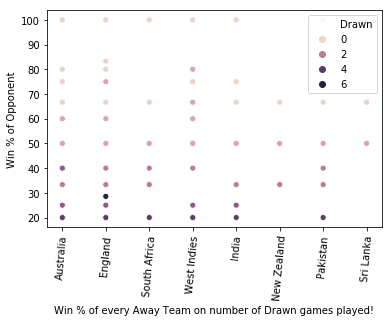

In [87]:
sns.scatterplot(data = df_home_lost,x = 'Opponent',y='Win % of Opponent' , hue = 'Drawn');
plt.xticks(rotation = 85);
plt.xlabel('Win % of every Away Team on number of Drawn games played!');

## *We get to see that countries such as **New Zealand, Pakistan and Sri Lanka have failed to attain 100% Success rate** in AWAY Conditions!*

## Next we get to know our top teams! which are: **Australia,England,SA, West indies and India!**

## *We tend to find out the mean of the Win % for each team respectively!*

## And then plot them in a Sorted order to find the top 2 teams performing best in their Home grounds!

In [88]:
myTeam_Aus = ['Australia']
df_home_won_Aus = df_home_won[df_home_won.Team.isin(myTeam_Aus)]
Australia_Mean = df_home_won_Aus['Win %'].mean()
myTeam_Eng = ['England']
df_home_won_Eng = df_home_won[df_home_won.Team.isin(myTeam_Eng)]
England_Mean = df_home_won_Eng['Win %'].mean()
myTeam_SA = ['South Africa']
df_home_won_SA = df_home_won[df_home_won.Team.isin(myTeam_SA)]
SA_Mean = df_home_won_SA['Win %'].mean()
myTeam_WI = ['West Indies']
df_home_won_WI = df_home_won[df_home_won.Team.isin(myTeam_WI)]
WI_Mean = df_home_won_WI['Win %'].mean()
myTeam_India = ['India']
df_home_won_India = df_home_won[df_home_won.Team.isin(myTeam_India)]
India_Mean = df_home_won_India['Win %'].mean()
myTeam_NZ = ['New Zealand']
df_home_won_NZ = df_home_won[df_home_won.Team.isin(myTeam_NZ)]
NZ_Mean = df_home_won_NZ['Win %'].mean()
myTeam_PK = ['Pakistan']
df_home_won_PK = df_home_won[df_home_won.Team.isin(myTeam_PK)]
PK_Mean = df_home_won_PK['Win %'].mean()
myTeam_SL = ['Sri Lanka']
df_home_won_SL = df_home_won[df_home_won.Team.isin(myTeam_SL)]
SL_Mean = df_home_won_SL['Win %'].mean()

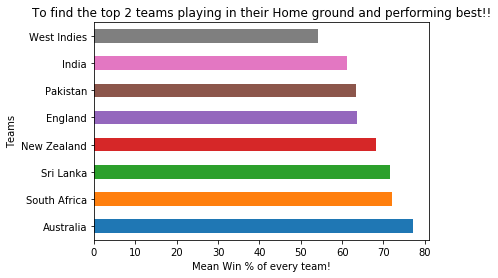

In [89]:
series_win_mean = pd.Series([Australia_Mean,England_Mean,SA_Mean,WI_Mean,India_Mean,NZ_Mean,PK_Mean,SL_Mean] , index = ['Australia','England','South Africa','West Indies','India'
                                                                                                                       ,'New Zealand','Pakistan','Sri Lanka'])
series_win_mean.sort_values(ascending=False).plot.barh();
plt.ylabel('Teams');
plt.xlabel('Mean Win % of every team!');
plt.title('To find the top 2 teams playing in their Home ground and performing best!!');

## *Now we intent to do the same for the Away Teams!*

In [90]:
myTeam_Aus = ['Australia']
df_home_won_Aus = df_home_lost[df_home_lost.Opponent.isin(myTeam_Aus)]
Australia_Mean = df_home_won_Aus['Win % of Opponent'].mean()
myTeam_Eng = ['England']
df_home_won_Eng = df_home_lost[df_home_lost.Opponent.isin(myTeam_Eng)]
England_Mean = df_home_won_Eng['Win % of Opponent'].mean()
myTeam_SA = ['South Africa']
df_home_won_SA = df_home_lost[df_home_lost.Opponent.isin(myTeam_SA)]
SA_Mean = df_home_won_SA['Win % of Opponent'].mean()
myTeam_WI = ['West Indies']
df_home_won_WI = df_home_lost[df_home_lost.Opponent.isin(myTeam_WI)]
WI_Mean = df_home_won_WI['Win % of Opponent'].mean()
myTeam_India = ['India']
df_home_won_India = df_home_lost[df_home_lost.Opponent.isin(myTeam_India)]
India_Mean = df_home_won_India['Win % of Opponent'].mean()
myTeam_NZ = ['New Zealand']
df_home_won_NZ = df_home_lost[df_home_lost.Opponent.isin(myTeam_NZ)]
NZ_Mean = df_home_won_NZ['Win % of Opponent'].mean()
myTeam_PK = ['Pakistan']
df_home_won_PK = df_home_lost[df_home_lost.Opponent.isin(myTeam_PK)]
PK_Mean = df_home_won_PK['Win % of Opponent'].mean()
myTeam_SL = ['Sri Lanka']
df_home_won_SL = df_home_lost[df_home_lost.Opponent.isin(myTeam_SL)]
SL_Mean = df_home_won_SL['Win % of Opponent'].mean()

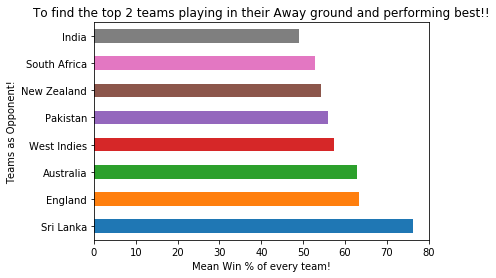

In [91]:
series_win_away_mean = pd.Series([Australia_Mean,England_Mean,SA_Mean,WI_Mean,India_Mean,NZ_Mean,PK_Mean,SL_Mean] , index = ['Australia','England','South Africa','West Indies','India'
                                                                                                                       ,'New Zealand','Pakistan','Sri Lanka'])
series_win_away_mean.sort_values(ascending=False).plot.barh();
plt.ylabel('Teams as Opponent!');
plt.xlabel('Mean Win % of every team!');
plt.title('To find the top 2 teams playing in their Away ground and performing best!!');

* Top 2 Teams in Home Ground! *Australia , South Africa!*
* Top 2 teams in Away Conditions! *Sri Lanka , England!*

### **Next we'll look to bin the Years and try to find out which team has played best in that Interval!**

### Let's get our Years separated from our 'Date' attribute!

In [92]:
df_home_won['Year Played'] = df_home_won['Date'].dt.year
df_home_won.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Team,Opponent,Date,Matches,Result,Won,Lost,Drawn,Day,Win %,Year Played
1,Australia,England,1879-02-01,1,Won,1,0,0,1,100.00,1879
2,England,Australia,1880-06-09,1,Won,1,0,0,9,100.00,1880
3,Australia,England,1881-12-31,4,Won,2,0,2,31,50.00,1881
6,Australia,England,1883-02-17,1,Won,1,0,0,17,100.00,1883
7,England,Australia,1884-11-07,3,Won,1,0,2,7,33.33,1884


## Now we will plot each Teams Win% over the years played in our Winning data frame on a Scatterplot to get a more elaborated view!

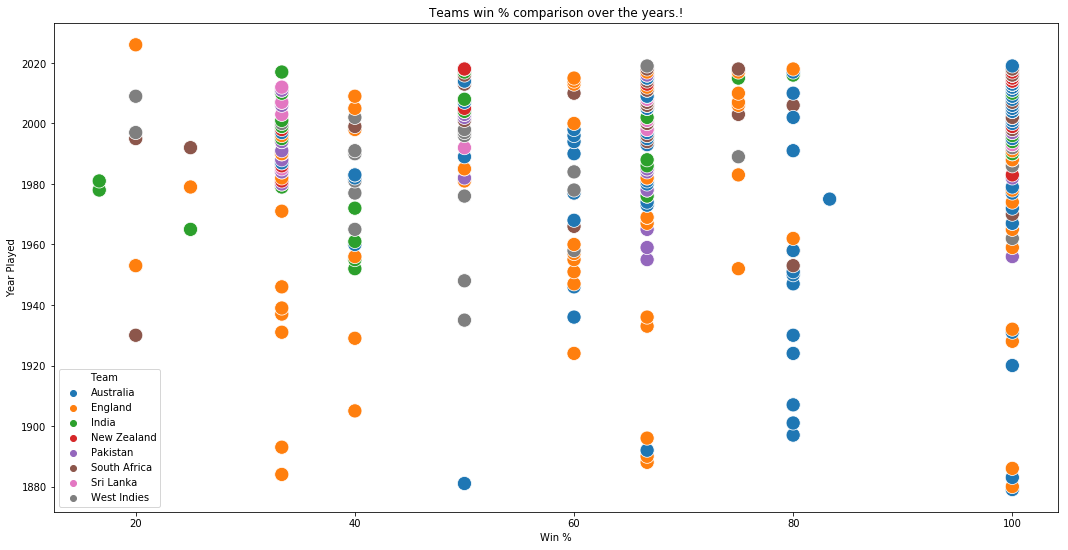

In [93]:
#Let's plot the win % for each team based on year Played
plt.figure(figsize=(18,9))
sns.scatterplot(data=df_home_won,x = 'Win %' , y='Year Played',marker = 'o',s=200,hue = 'Team');
plt.title('Teams win % comparison over the years.!');
plt.show();

## Let's plot a Correlation to our *df_home_won* data frame, to look how thw Win % and Match result as Won depends on!

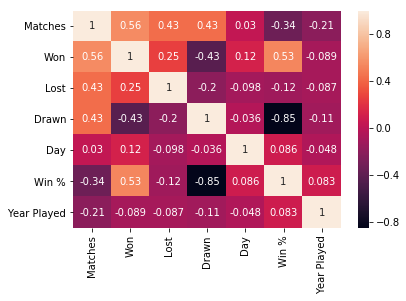

In [94]:
## Corrleation between the attributes!
cor = df_home_won.corr()
sns.heatmap(cor,annot=True);
plt.show();

## We see that Attribute *Won* is highly correlated to *Matches* , so we can say that more number of matches played in home condition, there is more than 50% chance of winning the match for the Home Team!

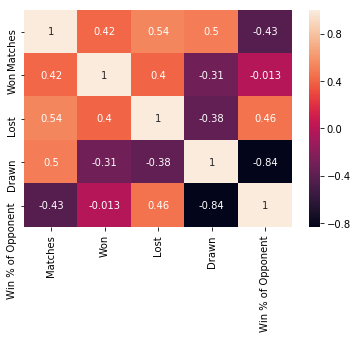

In [96]:
cor_away = df_home_lost.corr()
sns.heatmap(cor_away,annot = True);
plt.show();

## So we see that Team coming to play in away condtitions has lower correlation to the number of matches played!
#### Hmmm! that's interesting!

## So we have covered the following points!
1. Which Team performs best in Home ground---- Australia
2. Which Team performs best in Away ground---- West Indies
3. Which Team has lost more in Home ground---- Australia
4. Which Team has played a greater number of Matches in Home ground---- West Indies
5. Number of macthes played on each numerical day during the whole duration of years.
6. Calculated **win%** for each team in home ground!
7. Calculated **win % of opponent** for each team in away conditions!
8. Plotted **win %** of home teams in duration of years as Scatter plot.
9. Went on to see the Correlation for the Home Winning Teams and the Away Winning Teams!
10. Well we can do a lot more by looking for Machine Learning models!

# Till then think and Upvote if you like it! Thank for reading!!